In [1]:
#P1
#Submitter: jkmineau
#Partner: mcwalsh3

In [2]:
from git import Repo
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from datetime import datetime
import os
from subprocess import check_output
import json
import random
import string
import time

In [3]:
matplotlib.rcParams["font.size"]=16

In [4]:
dirname = "repo"
repo = Repo(dirname)
repo.git.checkout("master")

''

In [5]:
#Q1
commits=list(repo.iter_commits('master'))
commits.reverse()
len(commits)

8

In [6]:
#Q2
commit_authors={}
for commit in commits:
    if commit.author.name not in commit_authors:
        commit_authors[commit.author.name]=1
    else: commit_authors[commit.author.name]+=1
commit_authors

{'Ada': 3, 'Linus': 2, 'Steve': 3}

In [7]:
def get_ax():
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

Ada      3
Linus    2
Steve    3
dtype: int64

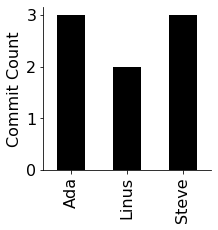

In [8]:
#Q3
ax=get_ax()
commit_a=pd.Series(commit_authors)
commit_a.plot.bar(figsize=(3,3),color='0',ax=ax)
ax.set_ylabel('Commit Count')
commit_a

In [9]:
#Q4
weekend_authors=set()
for c in commits:
    if datetime.weekday(datetime.fromtimestamp(c.authored_date))==6 or datetime.weekday(datetime.fromtimestamp(c.authored_date))==7:
        weekend_authors.add(c.author.name)
weekend_authors

{'Steve'}

In [10]:
#Q5
init_time=datetime.fromtimestamp(commits[0].authored_date)
l=[]
for c in commits:
    repo.git.checkout(c)
    lines=len(open(os.path.join('repo','wc.py')).readlines())
    days=(datetime.fromtimestamp(c.authored_date))-init_time
    days=days.total_seconds()/(24*60*60)
    l.append((days,lines))
    open(os.path.join('repo','wc.py')).close()
wc_over_time=pd.DataFrame(l,columns=['days','lines'])
wc_over_time.sort_values('days', inplace=True,ignore_index=True)
wc_over_time

,days,lines
0,0.000000,21
1,1.005046,35
2,3.880046,35
3,4.087963,39
4,5.921296,40
5,6.962963,40
6,9.171296,40
7,11.046296,43


Text(0.5, 0, 'Days Since Creation')

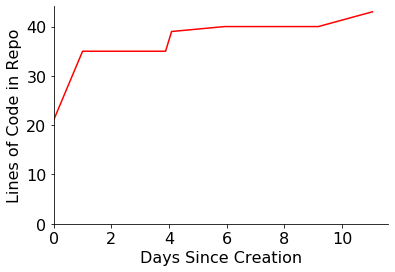

In [11]:
#Q6
ax=get_ax()
wc_over_time.plot.line(x='days',y='lines',ax=ax,ylim=0,xlim=0,legend=False,c='red')
ax.set_ylabel('Lines of Code in Repo')
ax.set_xlabel('Days Since Creation')

In [12]:
def run_wc(body, commit=None):
    filename='test.txt'
    f=open(filename,'w')
    f.write(body)
    f.close()
    if commit==None:
        repo.git.checkout('master')
    else:
        repo.git.checkout(commit)
    try:
        output=check_output('python3 repo/wc.py test.txt ALL', shell=True, encoding='utf-8')
        result=json.loads(output)
        return result
    except:
        return None

In [13]:
# test inputs to exercise wc.py

# expected result: {'X': 1, 'Y': 1, 'Z': 1}
test1 = """X Y Z"""

# expected result: 
test2 = """A B
A C
"""

# expected result: {'A': 2, 'B': 1, 'C': 1}
test3 = """A B
a c
"""

In [14]:
#Q7
run_wc(test1)

{'X': 1, 'Y': 1, 'Z': 1}

In [15]:
#Q8
run_wc(test3)

{'A': 2, 'B': 1, 'C': 1}

In [16]:
def test_table(body, expected):
    rows=[]
    for commit in commits:
        row=[]
        chex=commit.hexsha
        message=commit.message[:20].strip('\n')
        author=commit.author.name
        cpass=(expected==run_wc(body,commit))
        row.extend([chex,message,author,cpass])
        rows.append(row)
    return pd.DataFrame(rows,columns=['commit','msg20','author','pass'])        

In [17]:
#Q9
test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,True
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [18]:
#Q10
test_table(test2, {'A': 2, 'B': 1, 'C': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [19]:
#Q11
test_table(test3, {'A': 2, 'B': 1, 'C': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,False
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [20]:
#Test3 is the most useful because it contains upper and lowercase isntances of the same character.

In [21]:
#found at https://www.dev2qa.com/python-generate-random-string-of-specific-length/

def generate_random_string(base_string_character, string_size=10):
    ret_str = ''
    # Select random character for string_size times.
    for i in range(string_size):
        # Random select one character from the base character string.
        character = random.choice(base_string_character)
        # Append the selected character to the return string.
        ret_str += character
    return ret_str
def generate_random_alphabet(str_len=10):
    ret = generate_random_string(string.ascii_letters, str_len)
    return ret

In [22]:
def time_run_sec(uniq_words, total_words, word_size=6, commit=None):
    words_list=[]
    string_input=''
    for i in range(uniq_words):
        words_list.append(generate_random_alphabet(word_size))
    for i in range(total_words):
        word=random.choice(words_list)
        string_input+=(word+' ')
    repo.git.checkout(commit)
    t0=time.time()
    run_wc(string_input,commit)
    t1=time.time()
    total_time=t1-t0
    return total_time

In [23]:
versions = {
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
}

6.230796813964844
0.9543395042419434
0.07009601593017578
0.05365800857543945


Text(0.5, 0, 'Exec Time (ms)')

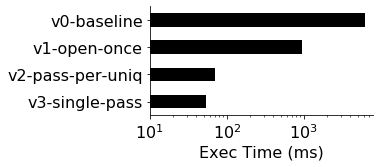

In [24]:
#Q12
dic={}
for c in versions:
    times=time_run_sec(100,5000,commit=versions[c])
    dic[c]=times*10**3
    print(times)
time_for_versions=pd.Series(dic)
time_for_versions.sort_values(inplace=True)
ax=get_ax()
time_for_versions.plot.barh(ax=ax, logx=True,figsize=(4,2), xticks=[10**1,10**2,10**3],color='0')
ax.set_xlabel('Exec Time (ms)')

6.991027355194092
1.737074613571167
0.05322432518005371
0.054625749588012695


Text(0.5, 0, 'Exec Time (ms)')

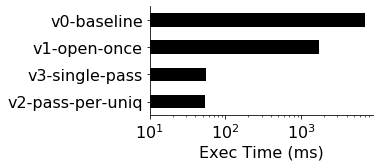

In [25]:
#Q13
dic={}
for c in versions:
    times=time_run_sec(1,5000,commit=versions[c])
    dic[c]=times*10**3
    print(times)
time_for_versions=pd.Series(dic)
time_for_versions.sort_values(inplace=True)
ax=get_ax()
time_for_versions.plot.barh(ax=ax, logx=True,color='0',figsize=(4,2), xticks=[10**1,10**2,10**3])
ax.set_xlabel('Exec Time (ms)')

In [26]:
#My hypothesis as to why V3 is better than V2 is that V3 doesn't search for unique words. 
#Instead it goes through the entire list. This might make it slower with extremely high total_words.